# Concrete Strength Prediction

https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength/data

In [1]:
# Imports

import os
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

/Users/martinbergsto/Documents/NTNU/Semester10/TMM4128-Studass/TMM4128-setup/tmm4128/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
path = kagglehub.dataset_download("mchilamwar/predict-concrete-strength")

print("Path to dataset files:", path)

Path to dataset files: /Users/martinbergsto/.cache/kagglehub/datasets/mchilamwar/predict-concrete-strength/versions/1


In [3]:
print(os.listdir(path))

['ConcreteStrengthData.csv']


In [4]:
file_path = os.path.join(path, "ConcreteStrengthData.csv")
df = pd.read_csv(file_path)

df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# Check column names
df.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [6]:
# Simple EDA
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# Zero ratios in numerical columns
(df == 0).sum() / len(df)

CementComponent              0.000000
BlastFurnaceSlag             0.457282
FlyAshComponent              0.549515
WaterComponent               0.000000
SuperplasticizerComponent    0.367961
CoarseAggregateComponent     0.000000
FineAggregateComponent       0.000000
AgeInDays                    0.000000
Strength                     0.000000
dtype: float64

In [8]:
# Split data into features and target
X = df.drop("Strength", axis=1)
y = df["Strength"]

In [9]:
# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Regressor

In [10]:
# Model training

model = RandomForestRegressor()
model.fit(X_train, y_train)

pred_rf = model.predict(X_test)


In [11]:
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, pred_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

MSE: 31.601683902796324
RMSE: 5.621537503459025
R2: 0.8773592642798472


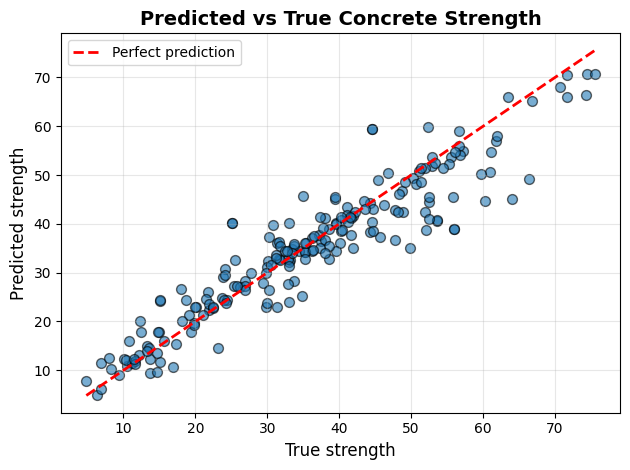

In [12]:
# Visualize predictions vs true strength

plt.figure()
plt.scatter(y_test, pred_rf, alpha=0.6, edgecolors="k", s=50)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
plt.xlabel("True strength", fontsize=12)
plt.ylabel("Predicted strength", fontsize=12)
plt.title("Predicted vs True Concrete Strength", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

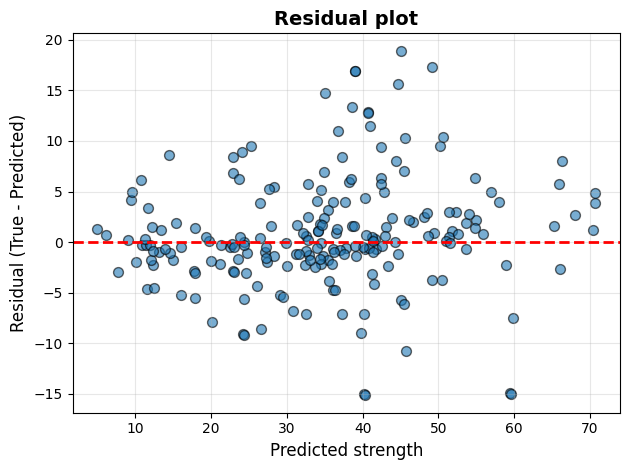

In [13]:
# Visualize residuals

residuals = y_test - pred_rf

plt.figure()
plt.scatter(pred_rf, residuals, alpha=0.6, edgecolors="k", s=50)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted strength", fontsize=12)
plt.ylabel("Residual (True - Predicted)", fontsize=12)
plt.title("Residual plot", fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

In [15]:
mse_lr = mean_squared_error(y_test, pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, pred_lr)
print("Linear Regression - MSE:", mse_lr)
print("Linear Regression - RMSE:", rmse_lr)
print("Linear Regression - R2:", r2_lr)

Linear Regression - MSE: 95.97094009110681
Linear Regression - RMSE: 9.79647590162436
Linear Regression - R2: 0.627553179231485


### Ridge Regression (linear model with L2 regularization)

In [16]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
pred_ridge = model_ridge.predict(X_test)

In [17]:
mse_ridge = mean_squared_error(y_test, pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y_test, pred_ridge)
print("Ridge Regression - MSE:", mse_ridge)
print("Ridge Regression - RMSE:", rmse_ridge)
print("Ridge Regression - R2:", r2_ridge)

Ridge Regression - MSE: 95.97089554036006
Ridge Regression - RMSE: 9.796473627809144
Ridge Regression - R2: 0.6275533521253212


### Gradient Boosting Regressor

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)
pred_gb = model_gb.predict(X_test)

In [19]:
mse_gb = mean_squared_error(y_test, pred_gb)
rmse_gb = mse_gb ** 0.5
r2_gb = r2_score(y_test, pred_gb)
print("Gradient Boosting - MSE:", mse_gb)
print("Gradient Boosting - RMSE:", rmse_gb)
print("Gradient Boosting - R2:", r2_gb)

Gradient Boosting - MSE: 30.18842951566388
Gradient Boosting - RMSE: 5.4943998321621885
Gradient Boosting - R2: 0.8828438630857456


### Extra Trees Regressor

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

model_et = ExtraTreesRegressor()
model_et.fit(X_train, y_train)
pred_et = model_et.predict(X_test)


In [21]:
mse_et = mean_squared_error(y_test, pred_et)
rmse_et = mse_et ** 0.5
r2_et = r2_score(y_test, pred_et)
print("Extra Trees - MSE:", mse_et)
print("Extra Trees - RMSE:", rmse_et)
print("Extra Trees - R2:", r2_et)

Extra Trees - MSE: 28.47569362617715
Extra Trees - RMSE: 5.336262139941885
Extra Trees - R2: 0.8894906984324651


### XGBoost

In [22]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8
)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)


In [23]:
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, pred_xgb)
print("XGBoost - MSE:", mse_xgb)
print("XGBoost - RMSE:", rmse_xgb)
print("XGBoost - R2:", r2_xgb)


XGBoost - MSE: 18.708279172345737
XGBoost - RMSE: 4.325306829849848
XGBoost - R2: 0.9273963650540955


### LightGBM

In [24]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor()
model_lgbm.fit(X_train, y_train)
pred_lgbm = model_lgbm.predict(X_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 973
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.857864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [25]:
mse_lgbm = mean_squared_error(y_test, pred_lgbm)
rmse_lgbm = mse_lgbm ** 0.5
r2_lgbm = r2_score(y_test, pred_lgbm)
print("LightGBM - MSE:", mse_lgbm)
print("LightGBM - RMSE:", rmse_lgbm)
print("LightGBM - R2:", r2_lgbm)

LightGBM - MSE: 21.997791727032897
LightGBM - RMSE: 4.6901803512266875
LightGBM - R2: 0.914630328879934


### Compare Results

In [26]:
# Compare all models

models_summary = pd.DataFrame({
    "Model": ["Random Forest", "Linear Regression", "Ridge Regression", "Gradient Boosting", "Extra Trees", "XGBoost", "LightGBM"],
    "MSE": [mse_rf, mse_lr, mse_ridge, mse_gb, mse_et, mse_xgb, mse_lgbm],
    "RMSE": [rmse_rf, rmse_lr, rmse_ridge, rmse_gb, rmse_et, rmse_xgb, rmse_lgbm],
    "R2": [r2_rf, r2_lr, r2_ridge, r2_gb, r2_et, r2_xgb, r2_lgbm]
})

models_summary

,Model,MSE,RMSE,R2
0,Random Forest,31.601684,5.621538,0.877359
1,Linear Regression,95.970940,9.796476,0.627553
2,Ridge Regression,95.970896,9.796474,0.627553
3,Gradient Boosting,30.188430,5.494400,0.882844
4,Extra Trees,28.475694,5.336262,0.889491
5,XGBoost,18.708279,4.325307,0.927396
6,LightGBM,21.997792,4.690180,0.914630


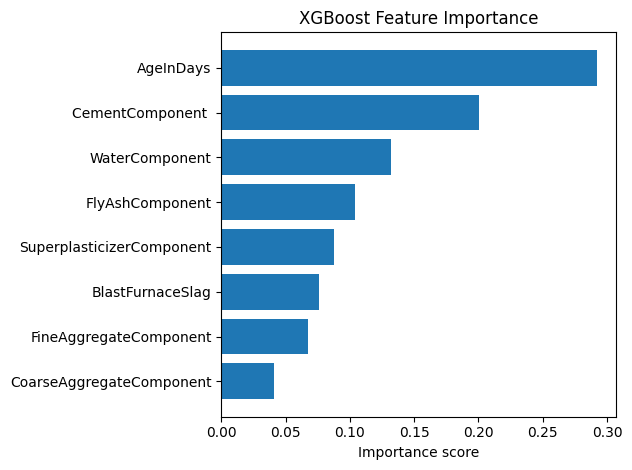

In [27]:
# Visualize XGBoost feature importance and predictions

importances = model_xgb.feature_importances_
feature_names = X_train.columns

fi = pd.DataFrame({"Feature": feature_names, "Importance": importances})
fi = fi.sort_values("Importance", ascending=True)

plt.figure()
plt.barh(fi["Feature"], fi["Importance"])
plt.xlabel("Importance score")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

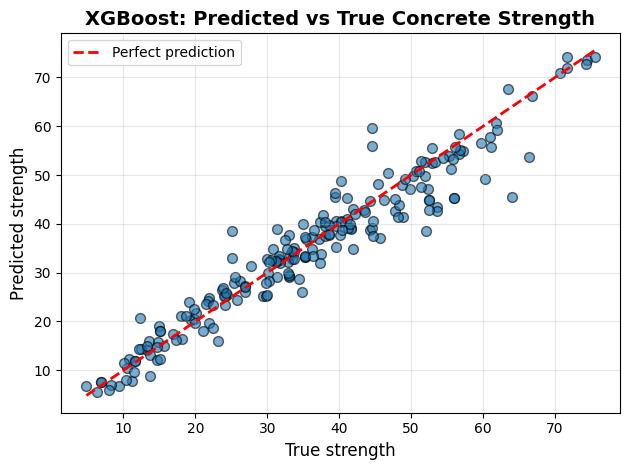

In [28]:
# Visualize predictions vs true strength

plt.figure()
plt.scatter(y_test, pred_xgb, alpha=0.6, edgecolors="k", s=50)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
plt.xlabel("True strength", fontsize=12)
plt.ylabel("Predicted strength", fontsize=12)
plt.title("XGBoost: Predicted vs True Concrete Strength", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()